# Import de librerías

In [29]:
import pandas as pd
import numpy as np
import json
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
%matplotlib inline

# Inspección de los datos

**Lectura del data set de videos**

In [68]:
data = pd.read_csv("../data/DEvideos_cc50_202101.csv")

**Muestra de las 10 primeras filas del dataset**

In [69]:
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,False,False,False,Wir haben Meinungsstudie.de (► http://bit.ly/2...,Hessen,51.300007,9.500030,POINT (9.500029661999999 51.30000694)
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...,Rheinland Pfalz,49.982472,8.273219,POINT (8.273219156 49.98247246)
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,False,False,False,4 unbekannte Gesichter animierter Charaktere (...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ernährungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ernä...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292)
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe...",Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292)


**Muestra de la info del dataset**

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40840 non-null  object 
 1   trending_date           40840 non-null  object 
 2   title                   40840 non-null  object 
 3   channel_title           40840 non-null  object 
 4   category_id             40840 non-null  int64  
 5   publish_time            40840 non-null  object 
 6   tags                    40840 non-null  object 
 7   views                   40840 non-null  int64  
 8   likes                   40840 non-null  int64  
 9   dislikes                40840 non-null  int64  
 10  comment_count           40840 non-null  int64  
 11  thumbnail_link          40840 non-null  object 
 12  comments_disabled       40840 non-null  bool   
 13  ratings_disabled        40840 non-null  bool   
 14  video_error_or_removed  40840 non-null

# Pre-procesamiento de datos

**Contador de la cantidad de valores NAN en el dataset**

In [71]:
data.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Contador de la cantidad de valores NULL en el dataset**

In [72]:
data.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Determinar si existen datos repetidos**

Podemos notar que no existen valores repetidos

In [78]:
data.duplicated().value_counts()

False    40826
dtype: int64

**Eliminación de las filas cuyos video hayan presentando un error o hayan sido eliminados**

In [73]:
data = data.drop(data[data["video_error_or_removed"] == True].index)

**Convertir "trending_date" y "publish_time" a formato fechas**

In [74]:
# Convertir el "trending_date" a formato de fecha
data["trending_date"]= pd.to_datetime(data["trending_date"], format="%y.%d.%m")

In [75]:
# Split del publish time y hour
publish_time = []
publish_hour = []
for value in data["publish_time"].values:
    publish_time.append(value.split("T")[0])
    publish_hour.append(value.split("T")[1])

In [76]:
# Pasar los valores a la columna "publish_time" y crear la columna "publish_hour"
data["publish_time"] = publish_time
data["publish_hour"] = publish_hour

In [77]:
# Convertir el "publish_time" a formato de fecha
data["publish_time"]= pd.to_datetime(data["publish_time"])

**Identificación de los datos atípicos**

<AxesSubplot:>

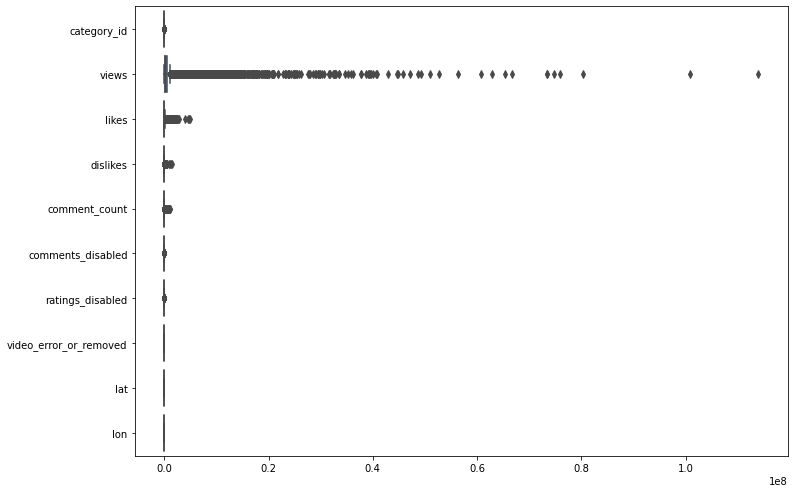

In [115]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=data,palette='rainbow',orient='h')

In [120]:
view_max = np.max(data["views"])
view_id = data[data.views == view_max].index[0]

channel = data["channel_title"][data.index[view_id]]
title = data["title"][data.index[view_id]]
views = data["views"][data.index[view_id]]

print(f"Canal del video con más visitas: {channel}")
print(f"Título del video con más visitas: {title}")
print(f"Número de visitas del video: {views}")

Canal del video con más visitas: YouTube Spotlight
Título del video con más visitas: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Número de visitas del video: 113876217


In [123]:
lk_max = np.max(data["likes"])
lk_id = data[data.likes == lk_max].index[0]

channel = data["channel_title"][data.index[view_id]]
title = data["title"][data.index[view_id]]
likes = data["likes"][data.index[view_id]]

print(f"Canal del video con más visitas: {channel}")
print(f"Título del video con más visitas: {title}")
print(f"Número de likes del video: {likes}")

Canal del video con más visitas: YouTube Spotlight
Título del video con más visitas: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Número de likes del video: 2811217


In [122]:
dlk_max = np.max(data["dislikes"])
dlk_id = data[data.dislikes == dlk_max].index[0]

channel = data["channel_title"][data.index[view_id]]
title = data["title"][data.index[view_id]]
dislikes = data["dislikes"][data.index[view_id]]

print(f"Canal del video con más visitas: {channel}")
print(f"Título del video con más visitas: {title}")
print(f"Número de visitas del video: {dislikes}")

Canal del video con más visitas: YouTube Spotlight
Título del video con más visitas: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Número de visitas del video: 1470386


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40826 entries, 0 to 40839
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40826 non-null  object        
 1   trending_date           40826 non-null  datetime64[ns]
 2   title                   40826 non-null  object        
 3   channel_title           40826 non-null  object        
 4   category_id             40826 non-null  int64         
 5   publish_time            40826 non-null  datetime64[ns]
 6   tags                    40826 non-null  object        
 7   views                   40826 non-null  int64         
 8   likes                   40826 non-null  int64         
 9   dislikes                40826 non-null  int64         
 10  comment_count           40826 non-null  int64         
 11  thumbnail_link          40826 non-null  object        
 12  comments_disabled       40826 non-null  bool  

### Lectura del archivo Json

**Lectura de los nombres de las categorías por "id" y creación de la columna "category" en el dataset**

In [80]:
f = open("../data/DE_category_id.json") # Alemania

dataJson = json.load(f)

f = open("../data/US_category_id.json") # US

dataJsonUS = json.load(f)

d = {}
dUS = {}
for i in dataJson["items"]:
    d[int(i["id"])] = i["snippet"]["title"]
    
for i in dataJsonUS["items"]:
    dUS[int(i["id"])] = i["snippet"]["title"]
    
cate = []
for i in range(len(data.index)):
    cat_id = data.iloc[i]["category_id"]
    # Si falta una categoría del Json de Alemania, se obtiene de US
    if cat_id in list(d):
        cate.append(d[cat_id])
    else:
        cate.append(dUS[cat_id])
    
data["category"] = cate

In [128]:
data.iloc[10:20]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,publish_hour,category
10,2hu_evXPpMM,2017-11-14,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,24,2017-11-12,"Dagi Bee|""Heiraten""|""Coldmirror""|""YouTube""|""Tr...",228574,11349,990,...,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),16:33:18.000Z,Entertainment
11,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57532,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),17:13:01.000Z,People & Blogs
12,2Zp-Qm3wJkA,2017-11-14,JP Performance - Quetschen wir den Japaner ma...,JP Performance,2,2017-11-13,"V8|""VMAX""|""Topspeed""|""Prüfstand""|""JP Performan...",465883,19928,216,...,False,False,False,Mal schauen was unser Japaner so kann! :D\n- -...,Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),10:30:01.000Z,Autos & Vehicles
13,mmMPprcmJeA,2017-11-14,Diese Schlafposition solltest Du unbedingt ver...,Liebscher & Bracht | Die Schmerzspezialisten,17,2017-11-12,"Liebscher|""Bracht""|""Faszien""|""LNB""|""Schmerzthe...",109571,4357,303,...,False,False,False,Weitere Infos zu diesem Thema findest du hier:...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),09:00:05.000Z,Sports
14,3U51cVIqulM,2017-11-14,ARAB Lifestyle | mit Bodyformus,PlanetKanax,23,2017-11-13,"planetkanax|""planet""|""kanax""|""planet kanax""|""a...",99988,6397,298,...,False,False,False,Video mit Bodyformus: https://youtu.be/EIM7RMe...,Mecklenburg Vorpommern,53.633304,11.416699,POINT (11.41669861 53.63330408),11:59:43.000Z,Comedy
15,OKYUtHvgMhc,2017-11-14,Die Welt in 30 Jahren - Sommer 2047 - VOLKAN,VOLKAN,24,2017-11-12,"Welt|""Natur""|""Umwelt""|""Klima""|""Klimawandel""",37877,1839,327,...,False,False,False,"Über die Zukunft nachzudenken macht Spaß, oder...",Sachsen,50.829984,12.919976,POINT (12.91997595 50.82998395),16:09:44.000Z,Entertainment
16,spwqQDCW4TI,2017-11-14,RUNDLAUF FUßBALL CHALLENGE + BESTRAFUNG !!,Brotatos,24,2017-11-13,"fußball challenge|""brotatos""|""fußball""|""footba...",111328,10692,115,...,False,False,False,Die Rundlauf Fußball Challenge! Jeder kennt da...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),14:03:32.000Z,Entertainment
17,-MAgDuA3H9A,2017-11-14,Schauriger_Geist.png - Thumbnail der Woche,Ultralativ,27,2017-11-12,"standartskill|""standart skill""|""standard skill...",93628,7924,118,...,False,False,False,"Geister gibt es überall... auf YouTube, man mu...",Bremen,53.550438,8.579982,POINT (8.579982461 53.55043805),13:00:00.000Z,Education
18,riV8xuBqUQ0,2017-11-14,Duell der Giganten 2.0 | inscopelifestyle,InscopeLifestyle,22,2017-11-12,"inscopelifestyle|""VLOG""|""CarVlog""|""lamborghini...",113961,8891,260,...,False,False,False,"Ihr wolltet ein zweites Duell der Giganten, ih...",Niedersachsen,53.129999,8.220004,POINT (8.220004434 53.1299986),16:34:53.000Z,People & Blogs
19,nNtrjfX2aGw,2017-11-14,KOCHEN mit TANZVERBOT | - 001#,TANZVERBOT,26,2017-11-13,"tanzverbot|""Kochen mit TANZVERBOT""|""kochen""|""s...",121928,16467,650,...,False,False,False,*Salat: http://amzn.to/2ib6Ja7\n*messer: http:...,Niedersachsen,53.129999,8.220004,POINT (8.220004434 53.1299986),19:00:11.000Z,Howto & Style


### Creación del nuevo dataset

In [129]:
data.to_csv('../data/DEvideos_cc50_202101_final.csv',index=False)

# Visualización de datos

<AxesSubplot:xlabel='count', ylabel='category'>

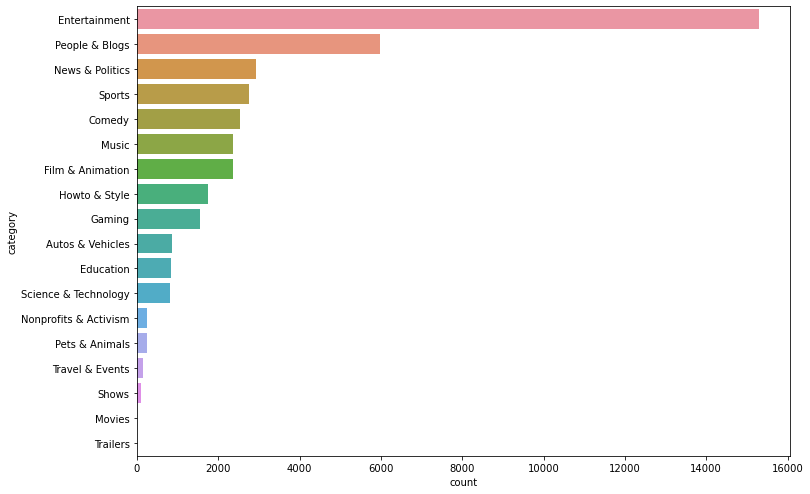

In [101]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='category', data=data, order = data['category'].value_counts().index)

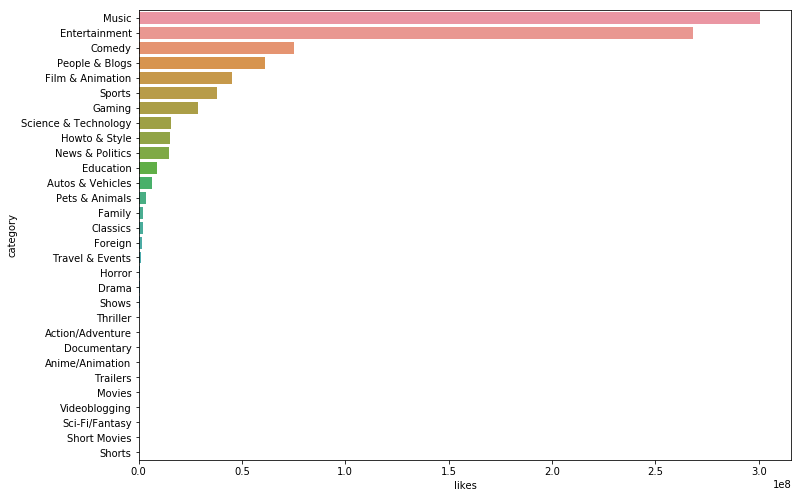

In [43]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='category', x='likes', data=data, ci=None, estimator=sum,
            order=data.groupby(['category'])['likes'].agg('sum').sort_values(ascending = False).index)


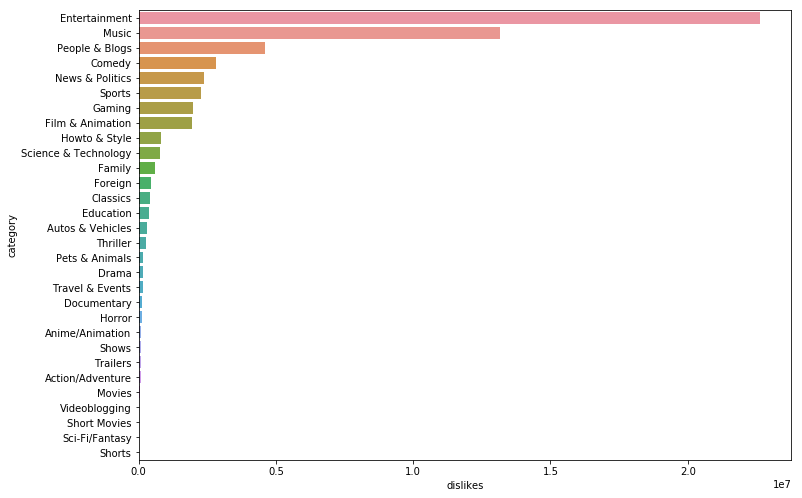

In [44]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='category', x='dislikes', data=data, ci=None, estimator=sum,
            order=data.groupby(['category'])['dislikes'].agg('sum').sort_values(ascending = False).index)


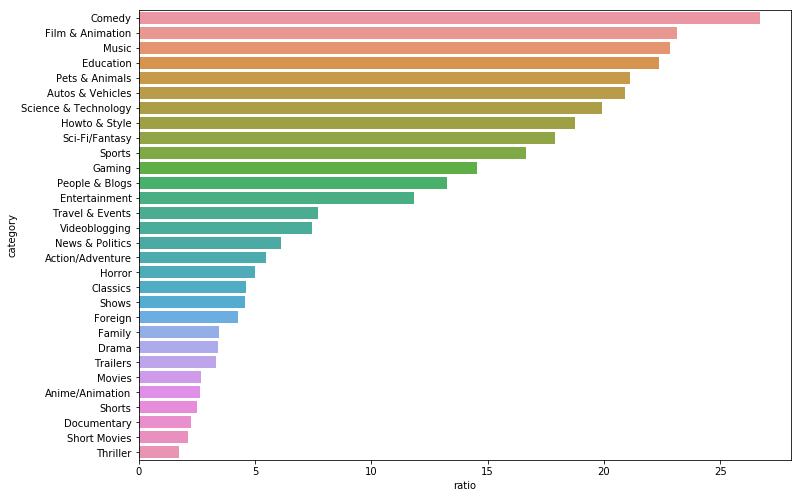

In [45]:
def ratio_likes_dislikes(x): return x['likes'].agg(
    'sum') / x['dislikes'].agg('sum')


r = data.groupby(['category']).apply(
    ratio_likes_dislikes).sort_values(ascending=False).reset_index(name='ratio')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='ratio', y='category', data=r, ci=None)


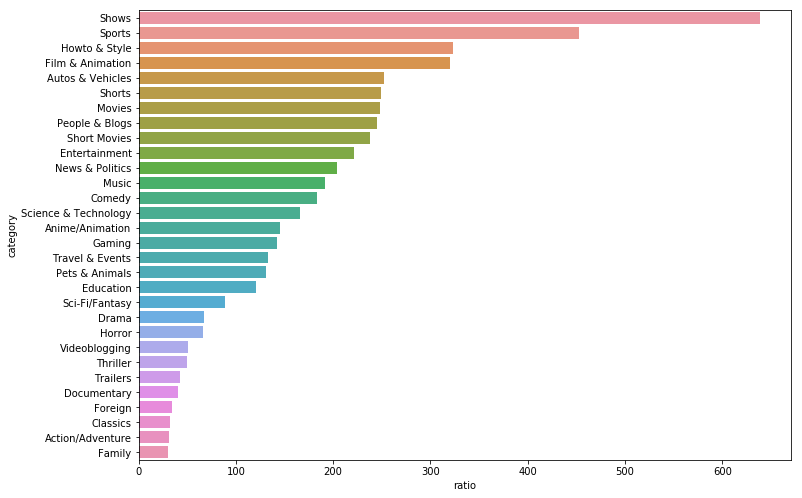

In [46]:
def ratio_views_comment(x): return x['views'].agg(
    'sum') / x['comment_count'].agg('sum')


r = data.groupby(['category']).apply(ratio_views_comment).sort_values(
    ascending=False).reset_index(name='ratio')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='ratio', y='category', data=r, ci=None)


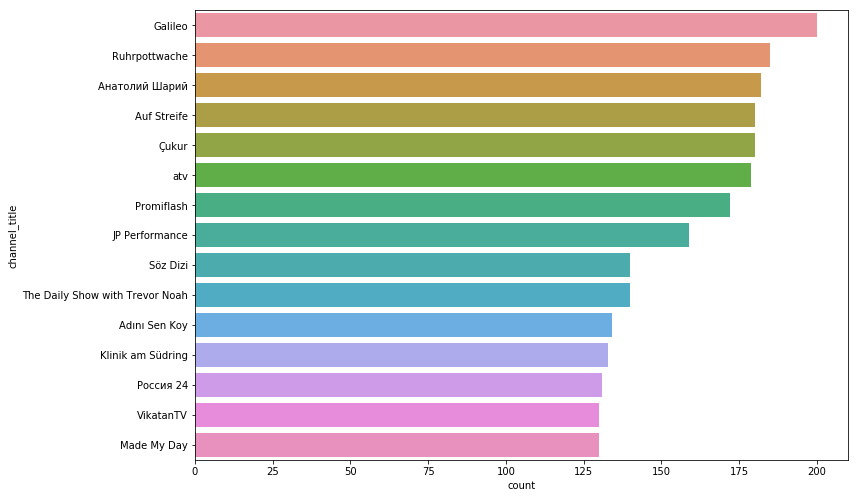

In [47]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='channel_title', data=data, order = data['channel_title'].value_counts().iloc[:15].index)


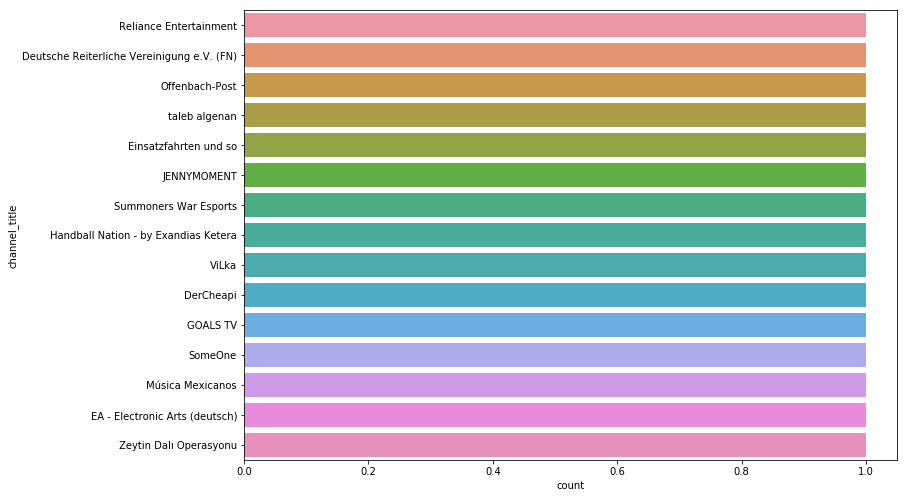

In [48]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='channel_title', data=data, order = data['channel_title'].value_counts().sort_values().iloc[:15].index)